In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#https://www.kaggle.com/datasets/teajay/global-shark-attacks/data

#Projektia tehnyt vain Tommi Hämäläinen ja Matias Isopahkala

df1 = pd.read_csv("attacks.csv", encoding="latin1") #sain vain erroria tämän koodin pyörittämisessä. Korjaantui encoding=latin1 jälkeen

# Clean 'Year' and 'Age' columns
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')
df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce')



Understanding the Dataset

In [2]:
sample=df1.sample(10) #random esimerkki 10 rivistä
print(sample)

        Case Number         Date    Year        Type       Country  \
1888   2002.01.01.b  01-Jan-2002  2002.0  Unprovoked  SOUTH AFRICA   
12998           NaN          NaN     NaN         NaN           NaN   
8657              0          NaN     NaN         NaN           NaN   
1605     2005.03.12  12-Mar-2005  2005.0    Provoked           USA   
9832            NaN          NaN     NaN         NaN           NaN   
4107     1959.02.27  27-Feb-1959  1959.0  Unprovoked     VENEZUELA   
4007     1960.03.31  31-Mar-1960  1960.0  Unprovoked           USA   
22852           NaN          NaN     NaN         NaN           NaN   
20945           NaN          NaN     NaN         NaN           NaN   
14296           NaN          NaN     NaN         NaN           NaN   

                Area                                           Location  \
1888   KwaZulu-Natal                                           Mtunzini   
12998            NaN                                                NaN   
8657

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df1.columns #sarakkeiden lukumäärä datasetissä

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
df1.index #rivien lukumäärä datasetissä

RangeIndex(start=0, stop=25723, step=1)

In [6]:
df1.shape #jos halutaan tietää sekä rivien että sarakkeiden määrä datasetissä (rows, columns)

(25723, 24)

In [7]:
df1.info() #näyttää tietoja, kuten sarakkeiden nimet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3369 non-null   float64
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Handling missing values

In [8]:
missingValues=df1.isnull().sum()
print(missingValues) #huomamme, että tästä datasetistä puuttuu paljon arvoja sarakkeistaan. huomattavasti eniten arvoja puuttuu unnamed 22 ja 23.

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22354
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64


In [9]:
total_df1=np.prod(df1.shape)
totalMissingValues=missingValues.sum()
percentageMissingValues=(totalMissingValues/total_df1)* 100
print(percentageMissingValues) #pyöristettynä 15,51% arvoista puuttuu datasetistä

79.10851507729788


In [10]:
#jotta koko datasettiä ei poistettaisi teen niin, että rivit joilla on vähintään kaksi ei NaN-arvoa säilytetään
df1=df1.dropna(thresh=2)
#koodilla df.fillna(method='bfill', axis=0).fillna(0) voisi täyttää kaikki NaN arvot seuraavalla arvolla, mutta uskon tämän pilaavan datasetin koska puuttuvia arvoja on niin paljon


Handling duplicates

In [11]:
df1=df1.drop_duplicates() #poistaa kaikki kaksinkertaiset rivit käyttämällä df1=df1 muuttaa koko koodin poistamaan kaikki kaksinkertaiset rivit, ei vain tämän koodi solusta

In [12]:
#lasketaan puuttuvat arvot uudelleen siivoamisen jälkeen
missingValues=df1.isnull().sum()
totalMissingValues=missingValues.sum()
percentageMissingValues=(totalMissingValues/total_df1)* 100
print(percentageMissingValues) #pyöristettynä vain enään 6,35% arvoista puuttuu datasetistä. Luku ei ole 0, koska aiemmin poistettiin vain rivit joissa oli kaksi ei NaN-arvoa
#solu tarvitsee aktivoida uudelleen niin arvo päivittyy

4.022988505747127


Data objects & attribute types

In [13]:
nominaalisetArvot = [ "Case Number", "Type", "Country", "Area", "Location", "Activity", "Name", "Sex", "Injury", "Time", "Species", "Investigator or Source" ]

binäärisetArvot = ["Fatal (Y/N)"]

ordinaalisetArvot = ["Year", "Age", "Date"]

print(nominaalisetArvot) #nominaaliset arvot ovat luokkia ilman järjestystä

print(binäärisetArvot) #binäärisissä arvoissa on vain kaksi mahdollista arvoa

print(ordinaalisetArvot) #ordinaalisilla arvoilla on selkeä järjestys

['Case Number', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Injury', 'Time', 'Species', 'Investigator or Source']
['Fatal (Y/N)']
['Year', 'Age', 'Date']


# Basic Statistics using NumPy


In [23]:
numeric_data = df1[['Age', 'Year']].dropna()
ages = numeric_data['Age'].to_numpy()
years = numeric_data['Year'].to_numpy()

# Mean & Median
mean_year = np.mean(years)
median_year = np.median(years)

mean_age = np.mean(ages)
median_age = np.median(ages)

# Standard Deviation & Variance
std_year = np.std(years)
var_year = np.var(years)

std_age = np.std(ages)
var_age = np.var(ages)

# Min & Max
min_year, max_year = np.min(years), np.max(years)
min_age, max_age = np.min(ages), np.max(ages)

# Sum & Product
sum_year = np.sum(years)
sum_age = np.sum(ages)

# Product (be careful — may overflow)
product_year = np.prod(years[:20])   # safer: first 20 values
product_age = np.prod(ages[:20])     # safer: first 20 values

# -----------------------------
# PRINT RESULTS
# -----------------------------
print("=== MEAN & MEDIAN ===")
print("Mean Year:", mean_year)
print("Median Year:", median_year)
print("Mean Age:", mean_age)
print("Median Age:", median_age)

print("\n=== STANDARD DEVIATION & VARIANCE ===")
print("Std Year:", std_year)
print("Var Year:", var_year)
print("Std Age:", std_age)
print("Var Age:", var_age)

print("\n=== MIN & MAX ===")
print("Year Range:", min_year, "to", max_year)
print("Age Range:", min_age, "to", max_age)

print("\n=== SUM & PRODUCT ===")
print("Sum of Years:", sum_year)
print("Sum of Ages:", sum_age)
print("Product of Years (first 20):", product_year)
print("Product of Ages (first 20):", product_age)

=== MEAN & MEDIAN ===
Mean Year: 1985.333226014166
Median Year: 1996.0
Mean Age: 27.29072762395364
Median Age: 24.0

=== STANDARD DEVIATION & VARIANCE ===
Std Year: 29.915787099728963
Var Year: 894.9543177963097
Std Age: 13.837392449408958
Var Age: 191.47342979896004

=== MIN & MAX ===
Year Range: 1858.0 to 2018.0
Age Range: 1.0 to 87.0

=== SUM & PRODUCT ===
Sum of Years: 6166445.0
Sum of Ages: 84765.0
Product of Years (first 20): 1.2543630083522437e+66
Product of Ages (first 20): 5.23141392377044e+28


#Visualization using Matplotlib

## LINE PLOT

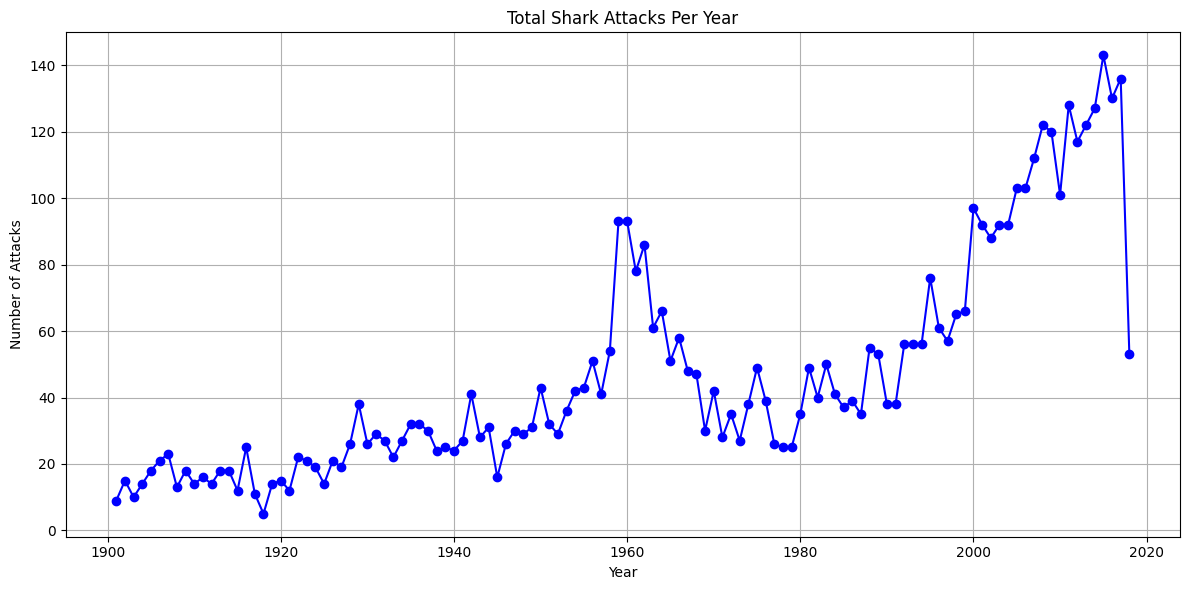

In [15]:
df1_1900 = df1[df1['Year'].notnull() & (df1['Year'] > 1900)]
attacks_per_year = df1_1900.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', color='b')
plt.title("Total Shark Attacks Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.tight_layout()
plt.show()

## SCATTER PLOT

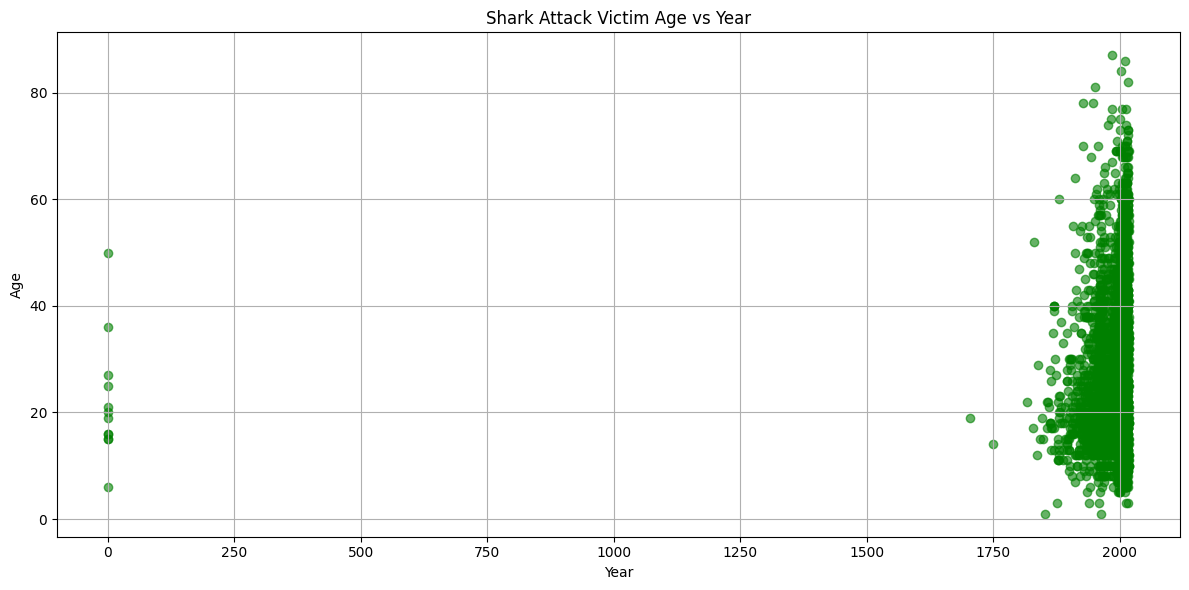

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(df1['Year'], df1['Age'], alpha=0.6, color='green')
plt.title("Shark Attack Victim Age vs Year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid(True)
plt.tight_layout()
plt.show()

## HISTOGRAM

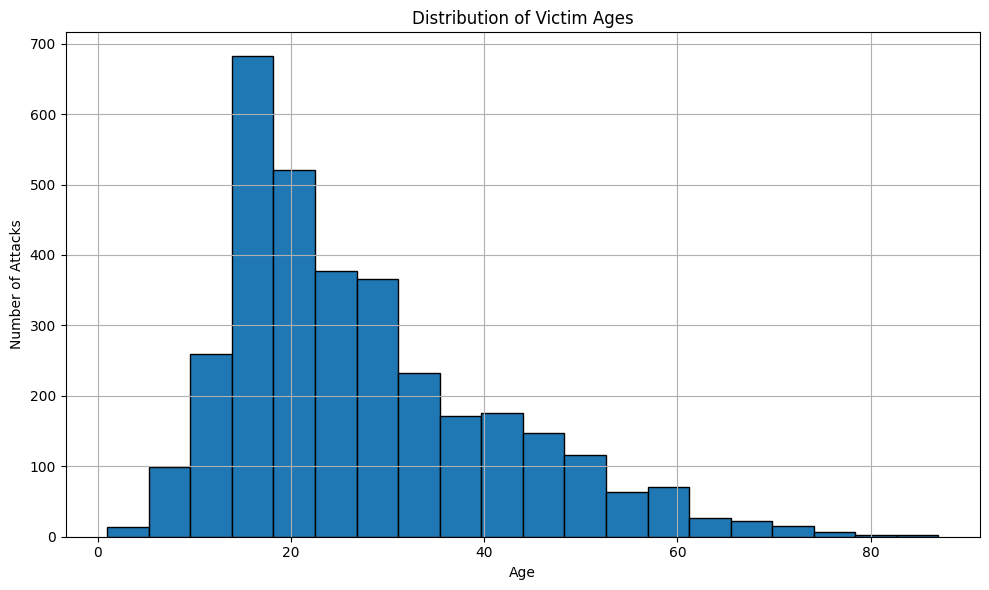

In [17]:
ages = df1['Age'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, edgecolor='black')
plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Number of Attacks")
plt.grid(True)
plt.tight_layout()
plt.show()

## BAR CHART

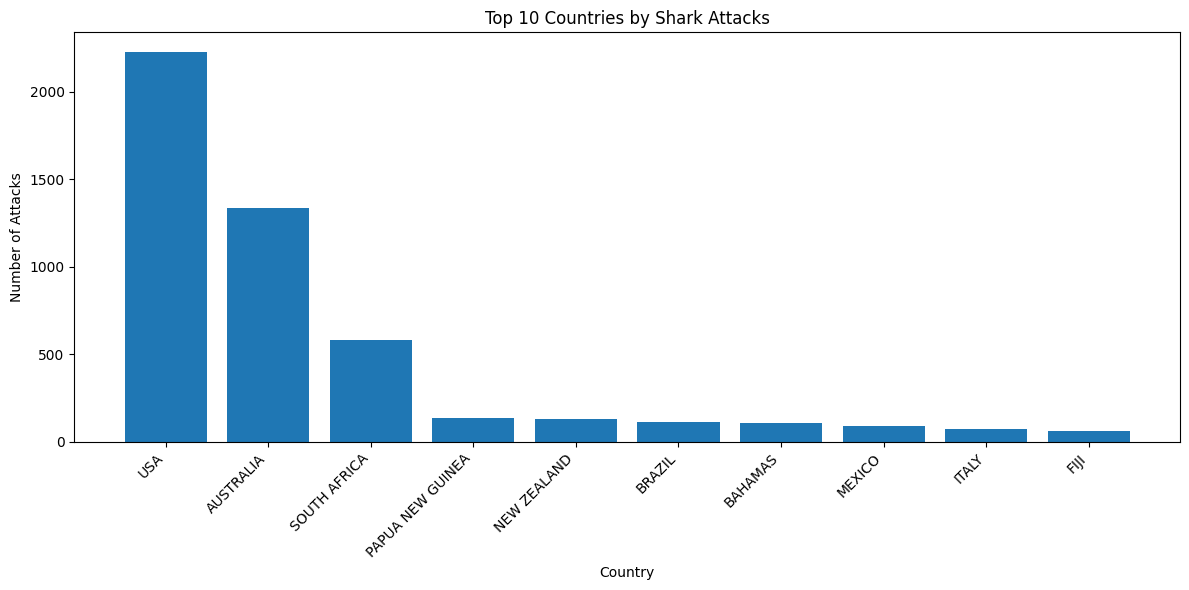

In [18]:
df1 = df1[df1['Country'].notnull()]

country_counts = df1['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(country_counts.index, country_counts.values)
plt.title("Top 10 Countries by Shark Attacks")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## PIE CHART

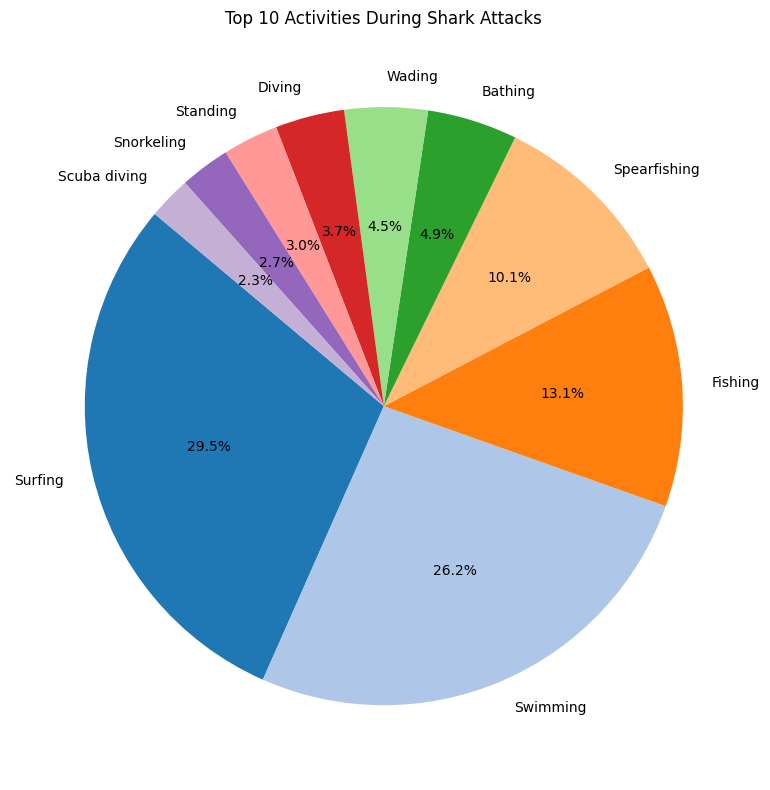

In [19]:
df1 = df1[df1['Country'].notnull()]

country_counts = df1['Activity'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Top 10 Activities During Shark Attacks")
plt.tight_layout()
plt.show()

## HEATMAP

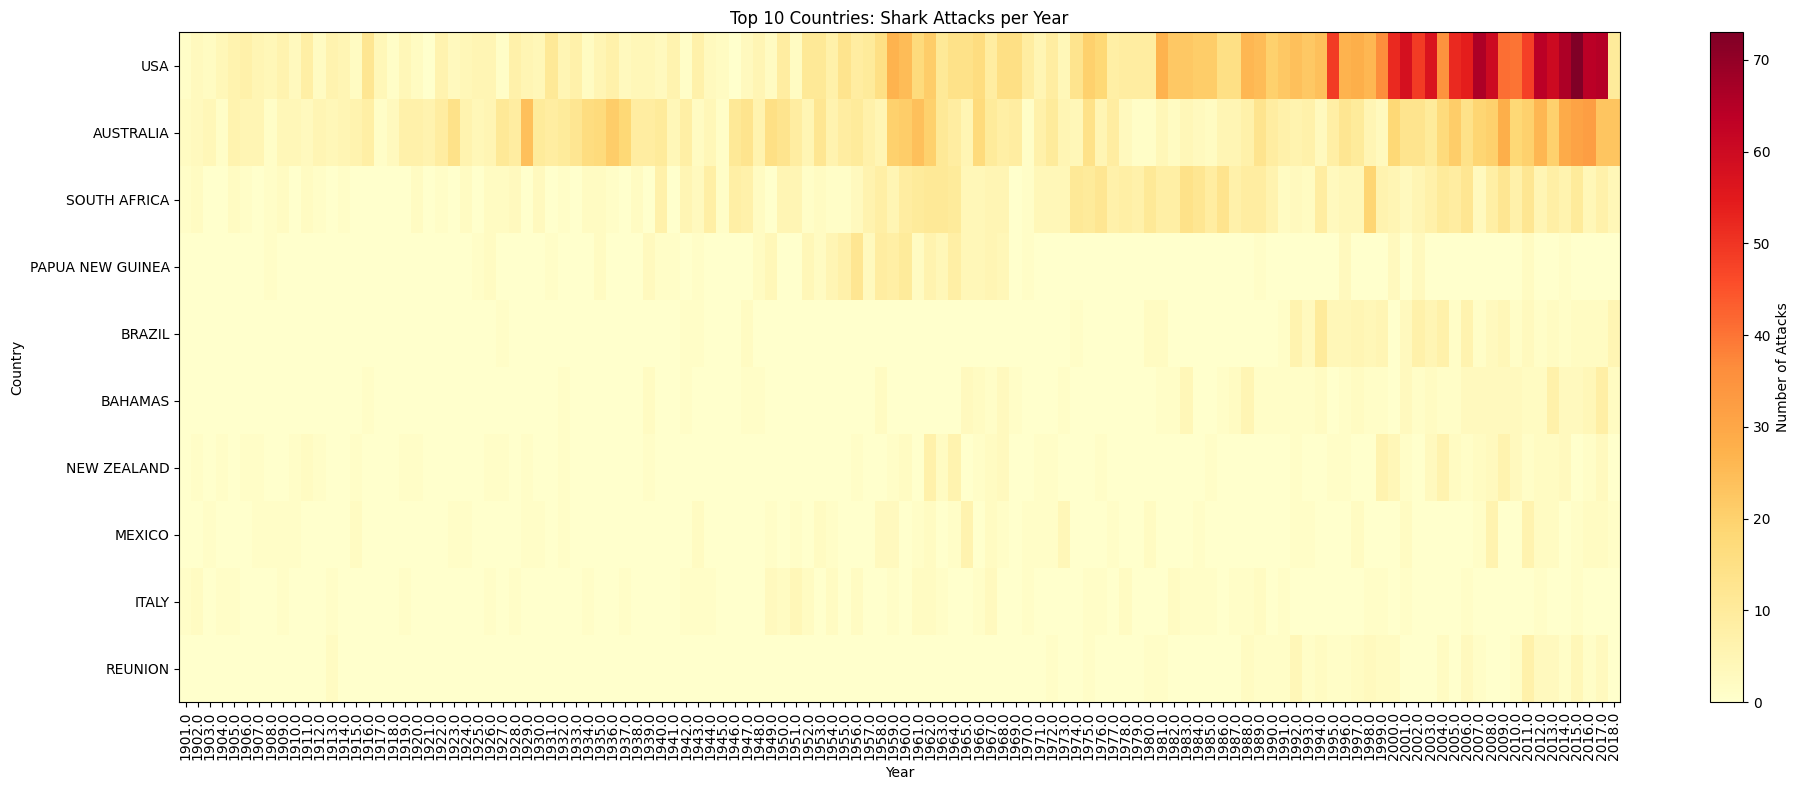

In [20]:
pivot = df1_1900.pivot_table(index='Country', columns='Year', aggfunc='size', fill_value=0)

top_countries = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top10 = pivot.loc[top_countries]

plt.figure(figsize=(20, 8))
plt.imshow(pivot_top10, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Number of Attacks')

plt.xticks(range(len(pivot_top10.columns)), pivot_top10.columns, rotation=90)
plt.yticks(range(len(pivot_top10.index)), pivot_top10.index)

plt.title("Top 10 Countries: Shark Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

## 3D PLOT

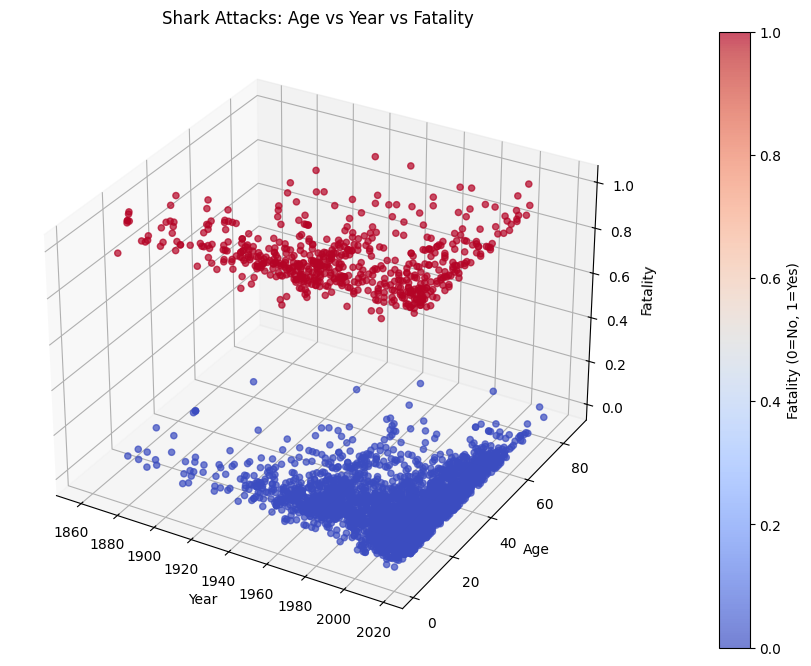

In [21]:
df1['Fatal'] = df1['Fatal (Y/N)'].map({'Y': 1, 'N': 0})

df1 = df1[df1['Year'].notnull() & df1['Age'].notnull() & df1['Fatal'].notnull() & (df1['Year'] > 1850)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df1['Year'], df1['Age'], df1['Fatal'], c=df1['Fatal'], cmap='coolwarm', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('Age')
ax.set_zlabel('Fatality')
ax.set_title('Shark Attacks: Age vs Year vs Fatality')

cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Fatality (0=No, 1=Yes)')

plt.show()